In [2]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')#loading numpy arrays from the previous code

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
# for building model using checkpoint 

In [7]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 63s 2s/step - loss: 0.5447 - accuracy: 0.7159 - val_loss: 0.4015 - val_accuracy: 0.8030
Epoch 2/20
33/33 [==============================] - 64s 2s/step - loss: 0.3895 - accuracy: 0.8362 - val_loss: 0.3545 - val_accuracy: 0.8598
Epoch 3/20
33/33 [==============================] - 64s 2s/step - loss: 0.3199 - accuracy: 0.8617 - val_loss: 0.2983 - val_accuracy: 0.8561
Epoch 4/20
33/33 [==============================] - 63s 2s/step - loss: 0.2520 - accuracy: 0.8958 - val_loss: 0.2486 - val_accuracy: 0.9091
Epoch 5/20
33/33 [==============================] - 61s 2s/step - loss: 0.2261 - accuracy: 0.9186 - val_loss: 0.2561 - val_accuracy: 0.8826
Epoch 6/20
33/33 [==============================] - 62s 2s/step - loss: 0.1975 - accuracy: 0.9223 - val_loss: 0.1954 - val_accuracy: 0.9205
Epoch 7/20
33/33 [==============================] - 60s 2s/step - loss: 0.1286 - accuracy: 0.9527 - val_loss: 0.2121 - val_accuracy: 0.9167
Epoch 8/20
33/33 [==

In [ ]:
# Ploting Model Accuracy

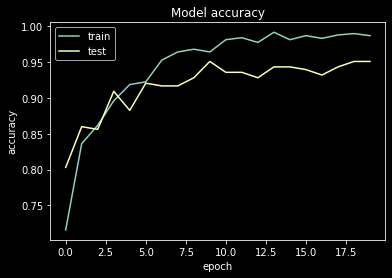

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# Ploting Model Loss

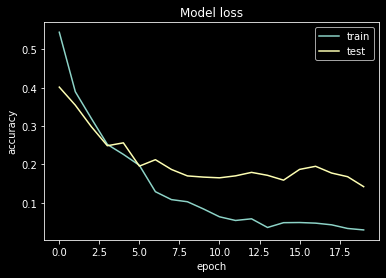

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 360ms/step - loss: 0.1999 - accuracy: 0.9388
[0.199906587600708, 0.9387755393981934]
